# Supplementary material

## Daily

In [1]:
%reset -f

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dadapy import Data
from sklearn.preprocessing import StandardScaler
from dadapy import DataSets as ds
from utils_zero_dist_imbalance import _get_imbalance_from_d1_to_d2, _get_average_imbalance_from_d1_to_d2
from scipy.spatial.distance import pdist, squareform

plt.rcParams['text.usetex'] = True

In [3]:
NUM_COLORS1 = 33
cm_1 = plt.get_cmap('Wistia')
colors1 = [cm_1(1.*i/NUM_COLORS1) for i in range(NUM_COLORS1)]
colors1_test = np.array(colors1)
colors1_test = colors1_test[::-1]

In [4]:
files = ["../Data/daily_data.txt"]
file_labels = ["day"]

labels = np.array(['GPR', 'VSTOXX', 'Unc. EUR/USD', 'Unc. EUR/JPY', 'Unc. EUR/GBP', 'Unc. EUR/CHF',
       'Nat. Gas', 'Elec. p. SPAIN', 'Elec. p. GER', 'Elec. p. IT',
       'Elec. p. FR', 'Brent Oil', 'Coal', 'Gold', 'EUR/USD Spot',
       'EUR/JPY Spot', 'EUR/GBP Spot', 'EUR/CHF Spot',
       'Bloom. Energy p. ind.', 'Sol. ESG fossil ind.',
       'SP Euro50 Env. ind.', 'MSCI Ener. sec. ind.', 'ERIX ind.', 'EUROnext100', 'IBEX35', 'DAX',
       'CAC', 'FTSEmib', 'EUROSTOXX Elect. ind.', '10 Year Bond y.', '3 Month Bond y.',
       'Inflation', 'GDP'])

In [5]:
data_sets = []
for file in files:
    data = np.genfromtxt(file)
    data_sets.append(data)

data_daily = np.genfromtxt(files[0])
y = []
X = []
y = data_daily[:, 0][:, None]
X = data_daily[:, 1:]

In [ ]:
d_y = Data(y, maxk=y.shape[0]-1)
d_y.compute_distances()

d_X = Data(X, maxk=X.shape[0]-1)
d_X.compute_distances()

d_y_dist_matrix = squareform(pdist(y, 'euclidean'))
imbalance_old = _get_imbalance_from_d1_to_d2(d_X, d_y)
imbalance_new =_get_imbalance_from_d1_to_d2(d_y, d_X)
imbalance_average_X_to_y = _get_average_imbalance_from_d1_to_d2(d_X, d_y_dist_matrix)

In [ ]:
inf_imb_X_to_y = []
inf_imb_X_to_y_average = []

for i in range(X.shape[1]):
    print(i)
    d_i = Data(X[:, [i]], maxk=X.shape[0]-1)
    d_i.compute_distances()
    inf_imb_X_to_y.append(_get_imbalance_from_d1_to_d2(d_i, d_y))
    inf_imb_X_to_y_average.append(_get_average_imbalance_from_d1_to_d2(d_i, d_y_dist_matrix))

In [ ]:
inf_imb_y_to_X = []
inf_imb_y_to_X_average = []

for i in range(X.shape[1]):
    print(i)
    X_i = X[:, [i]]
    d_x_i = squareform(pdist(X_i, 'euclidean'))
    d = Data(y, maxk=y.shape[0]-1)
    d.compute_distances()
    inf_imb_y_to_X.append(_get_imbalance_from_d1_to_d2(d, d_X))
    inf_imb_y_to_X_average.append(_get_average_imbalance_from_d1_to_d2(d, d_x_i))

In [9]:
sort_idx = np.argsort(inf_imb_X_to_y_average)
inf_imb_X_to_y_average = np.array(inf_imb_X_to_y_average)[sort_idx]
inf_imb_X_to_y = np.array(inf_imb_X_to_y)[sort_idx]
labels = labels[sort_idx]
inf_imb_y_to_X_average = np.array(inf_imb_y_to_X_average)[sort_idx]
inf_imb_y_to_X = np.array(inf_imb_y_to_X)[sort_idx]

In [10]:
enumeration = np.arange(1, len(inf_imb_X_to_y_average)+1)
single_imbs = np.zeros((33,2))
single_imbs[:,0] = inf_imb_X_to_y_average
single_imbs[:,1] = inf_imb_y_to_X_average

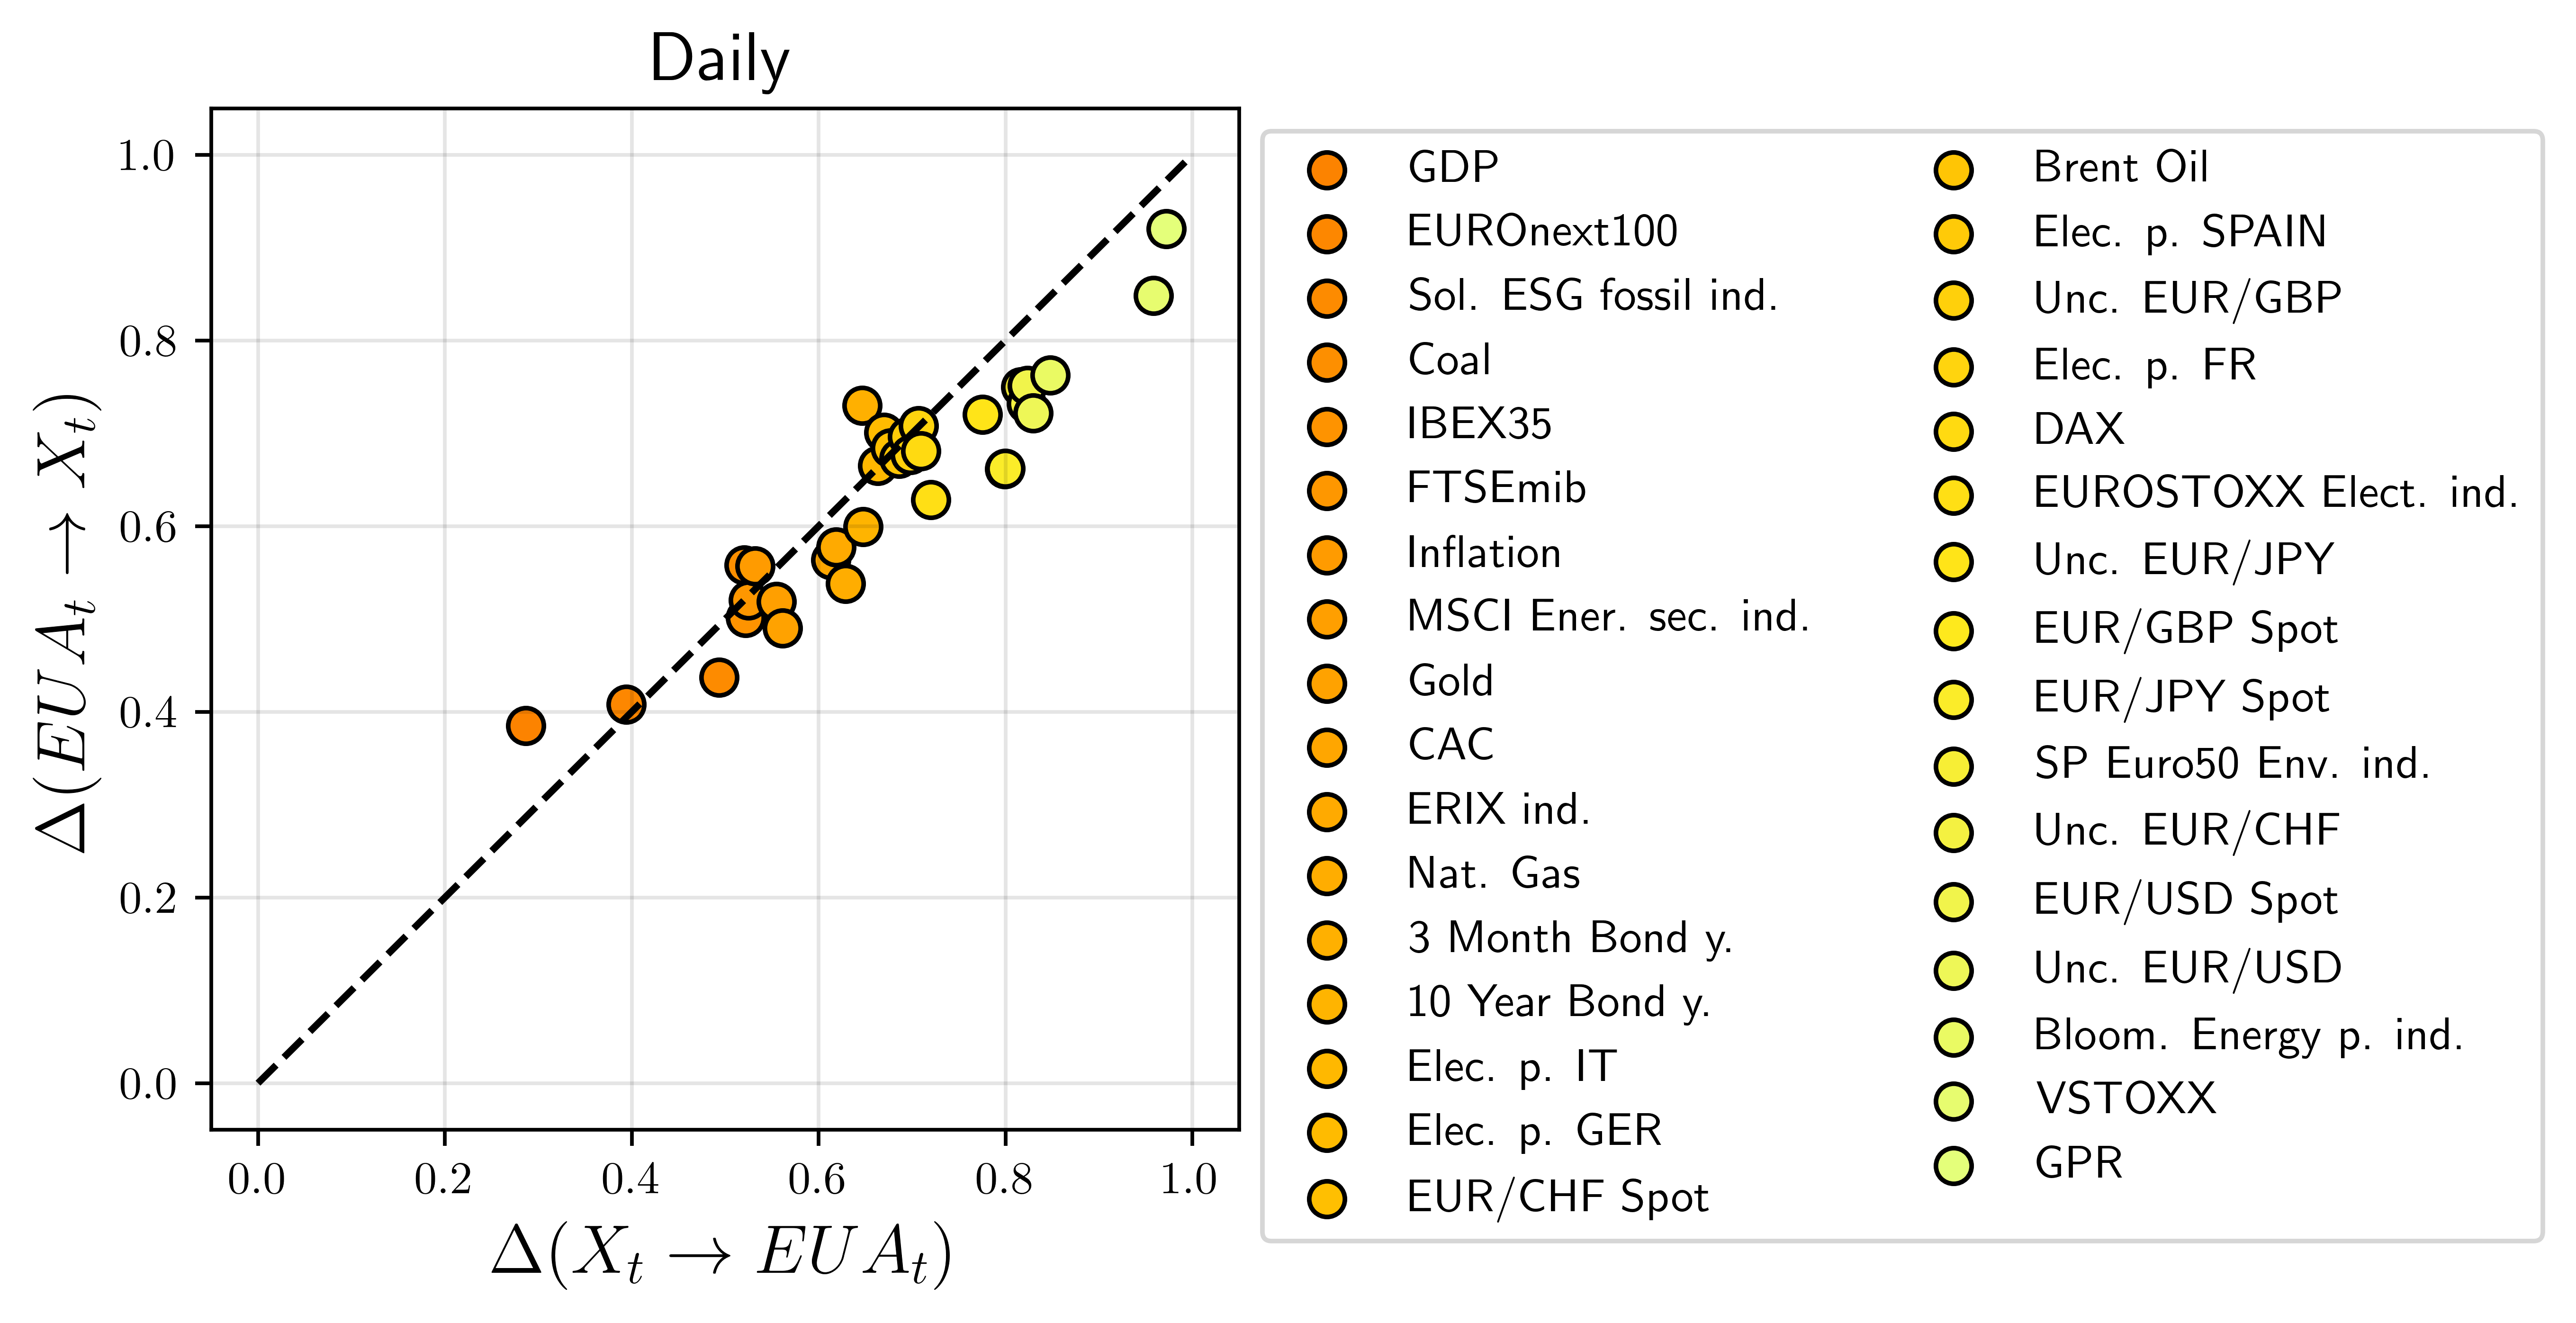

In [11]:
fig, ax = plt.subplots(figsize=(4,4), dpi = 700)
ax.set_facecolor("white")
for i, imbs in enumerate(single_imbs):
    plt.scatter(imbs[0], imbs[1], color = colors1_test[i], s=60, edgecolor ='k', label = labels[i])
plt.plot([0, 1], 'k--')
plt.legend(ncol = 2, bbox_to_anchor=(1.0, 1.))
plt.xlabel(r'$\Delta(X_{t} \rightarrow EUA_{t})$', fontsize=15)
plt.ylabel(r'$\Delta(EUA_{t}\rightarrow X_{t})$', fontsize=15)
plt.title('Daily', fontsize=15)
plt.grid(axis='both',color="black", alpha=.1)
#fig.savefig('../Figures/FigS1_Imbalance_Daily.png', dpi=700, bbox_inches='tight')

***

## Biweekly

In [12]:
%reset -f

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dadapy import Data
from sklearn.preprocessing import StandardScaler
from dadapy import DataSets as ds
from utils_zero_dist_imbalance import _get_imbalance_from_d1_to_d2, _get_average_imbalance_from_d1_to_d2
from scipy.spatial.distance import pdist, squareform

plt.rcParams['text.usetex'] = True

In [14]:
NUM_COLORS1 = 33
cm_1 = plt.get_cmap('Wistia')
colors1 = [cm_1(1.*i/NUM_COLORS1) for i in range(NUM_COLORS1)]
colors1_test = np.array(colors1)
colors1_test = colors1_test[::-1]

In [15]:
files = ["../Data/biweekly_data.txt"]
file_labels = ["biweekly"]

labels = np.array(['GPR', 'VSTOXX', 'Unc. EUR/USD', 'Unc. EUR/JPY', 'Unc. EUR/GBP', 'Unc. EUR/CHF',
       'Nat. Gas', 'Elec. p. SPAIN', 'Elec. p. GER', 'Elec. p. IT',
       'Elec. p. FR', 'Brent Oil', 'Coal', 'Gold', 'EUR/USD Spot',
       'EUR/JPY Spot', 'EUR/GBP Spot', 'EUR/CHF Spot',
       'Bloom. Energy p. ind.', 'Sol. ESG fossil ind.',
       'SP Euro50 Env. ind.', 'MSCI Ener. sec. ind.', 'ERIX ind.', 'EUROnext100', 'IBEX35', 'DAX',
       'CAC', 'FTSEmib', 'EUROSTOXX Elect. ind.', '10 Year Bond y.', '3 Month Bond y.',
       'Inflation', 'GDP'])

In [16]:
data_sets = []
for file in files:
    data = np.genfromtxt(file)
    data_sets.append(data)

data_daily = np.genfromtxt(files[0])
y = []
X = []
y = data_daily[:, 0][:, None]
X = data_daily[:, 1:]

In [ ]:
d_y = Data(y, maxk=y.shape[0]-1)
d_y.compute_distances()

d_X = Data(X, maxk=X.shape[0]-1)
d_X.compute_distances()

d_y_dist_matrix = squareform(pdist(y, 'euclidean'))
imbalance_old = _get_imbalance_from_d1_to_d2(d_X, d_y)
imbalance_new =_get_imbalance_from_d1_to_d2(d_y, d_X)
imbalance_average_X_to_y = _get_average_imbalance_from_d1_to_d2(d_X, d_y_dist_matrix)

In [ ]:
inf_imb_X_to_y = []
inf_imb_X_to_y_average = []

for i in range(X.shape[1]):
    d_i = Data(X[:, [i]], maxk=X.shape[0]-1)
    d_i.compute_distances()
    inf_imb_X_to_y.append(_get_imbalance_from_d1_to_d2(d_i, d_y))
    inf_imb_X_to_y_average.append(_get_average_imbalance_from_d1_to_d2(d_i, d_y_dist_matrix))

In [ ]:
inf_imb_y_to_X = []
inf_imb_y_to_X_average = []

for i in range(X.shape[1]):
    X_i = X[:, [i]]
    d_x_i = squareform(pdist(X_i, 'euclidean'))
    d = Data(y, maxk=y.shape[0]-1)
    d.compute_distances()
    inf_imb_y_to_X.append(_get_imbalance_from_d1_to_d2(d, d_X))
    inf_imb_y_to_X_average.append(_get_average_imbalance_from_d1_to_d2(d, d_x_i))

In [20]:
sort_idx = np.argsort(inf_imb_X_to_y_average)
inf_imb_X_to_y_average = np.array(inf_imb_X_to_y_average)[sort_idx]
inf_imb_X_to_y = np.array(inf_imb_X_to_y)[sort_idx]
labels = labels[sort_idx]
inf_imb_y_to_X_average = np.array(inf_imb_y_to_X_average)[sort_idx]
inf_imb_y_to_X = np.array(inf_imb_y_to_X)[sort_idx]

In [21]:
enumeration = np.arange(1, len(inf_imb_X_to_y_average)+1)
single_imbs = np.zeros((33,2))
single_imbs[:,0] = inf_imb_X_to_y_average
single_imbs[:,1] = inf_imb_y_to_X_average

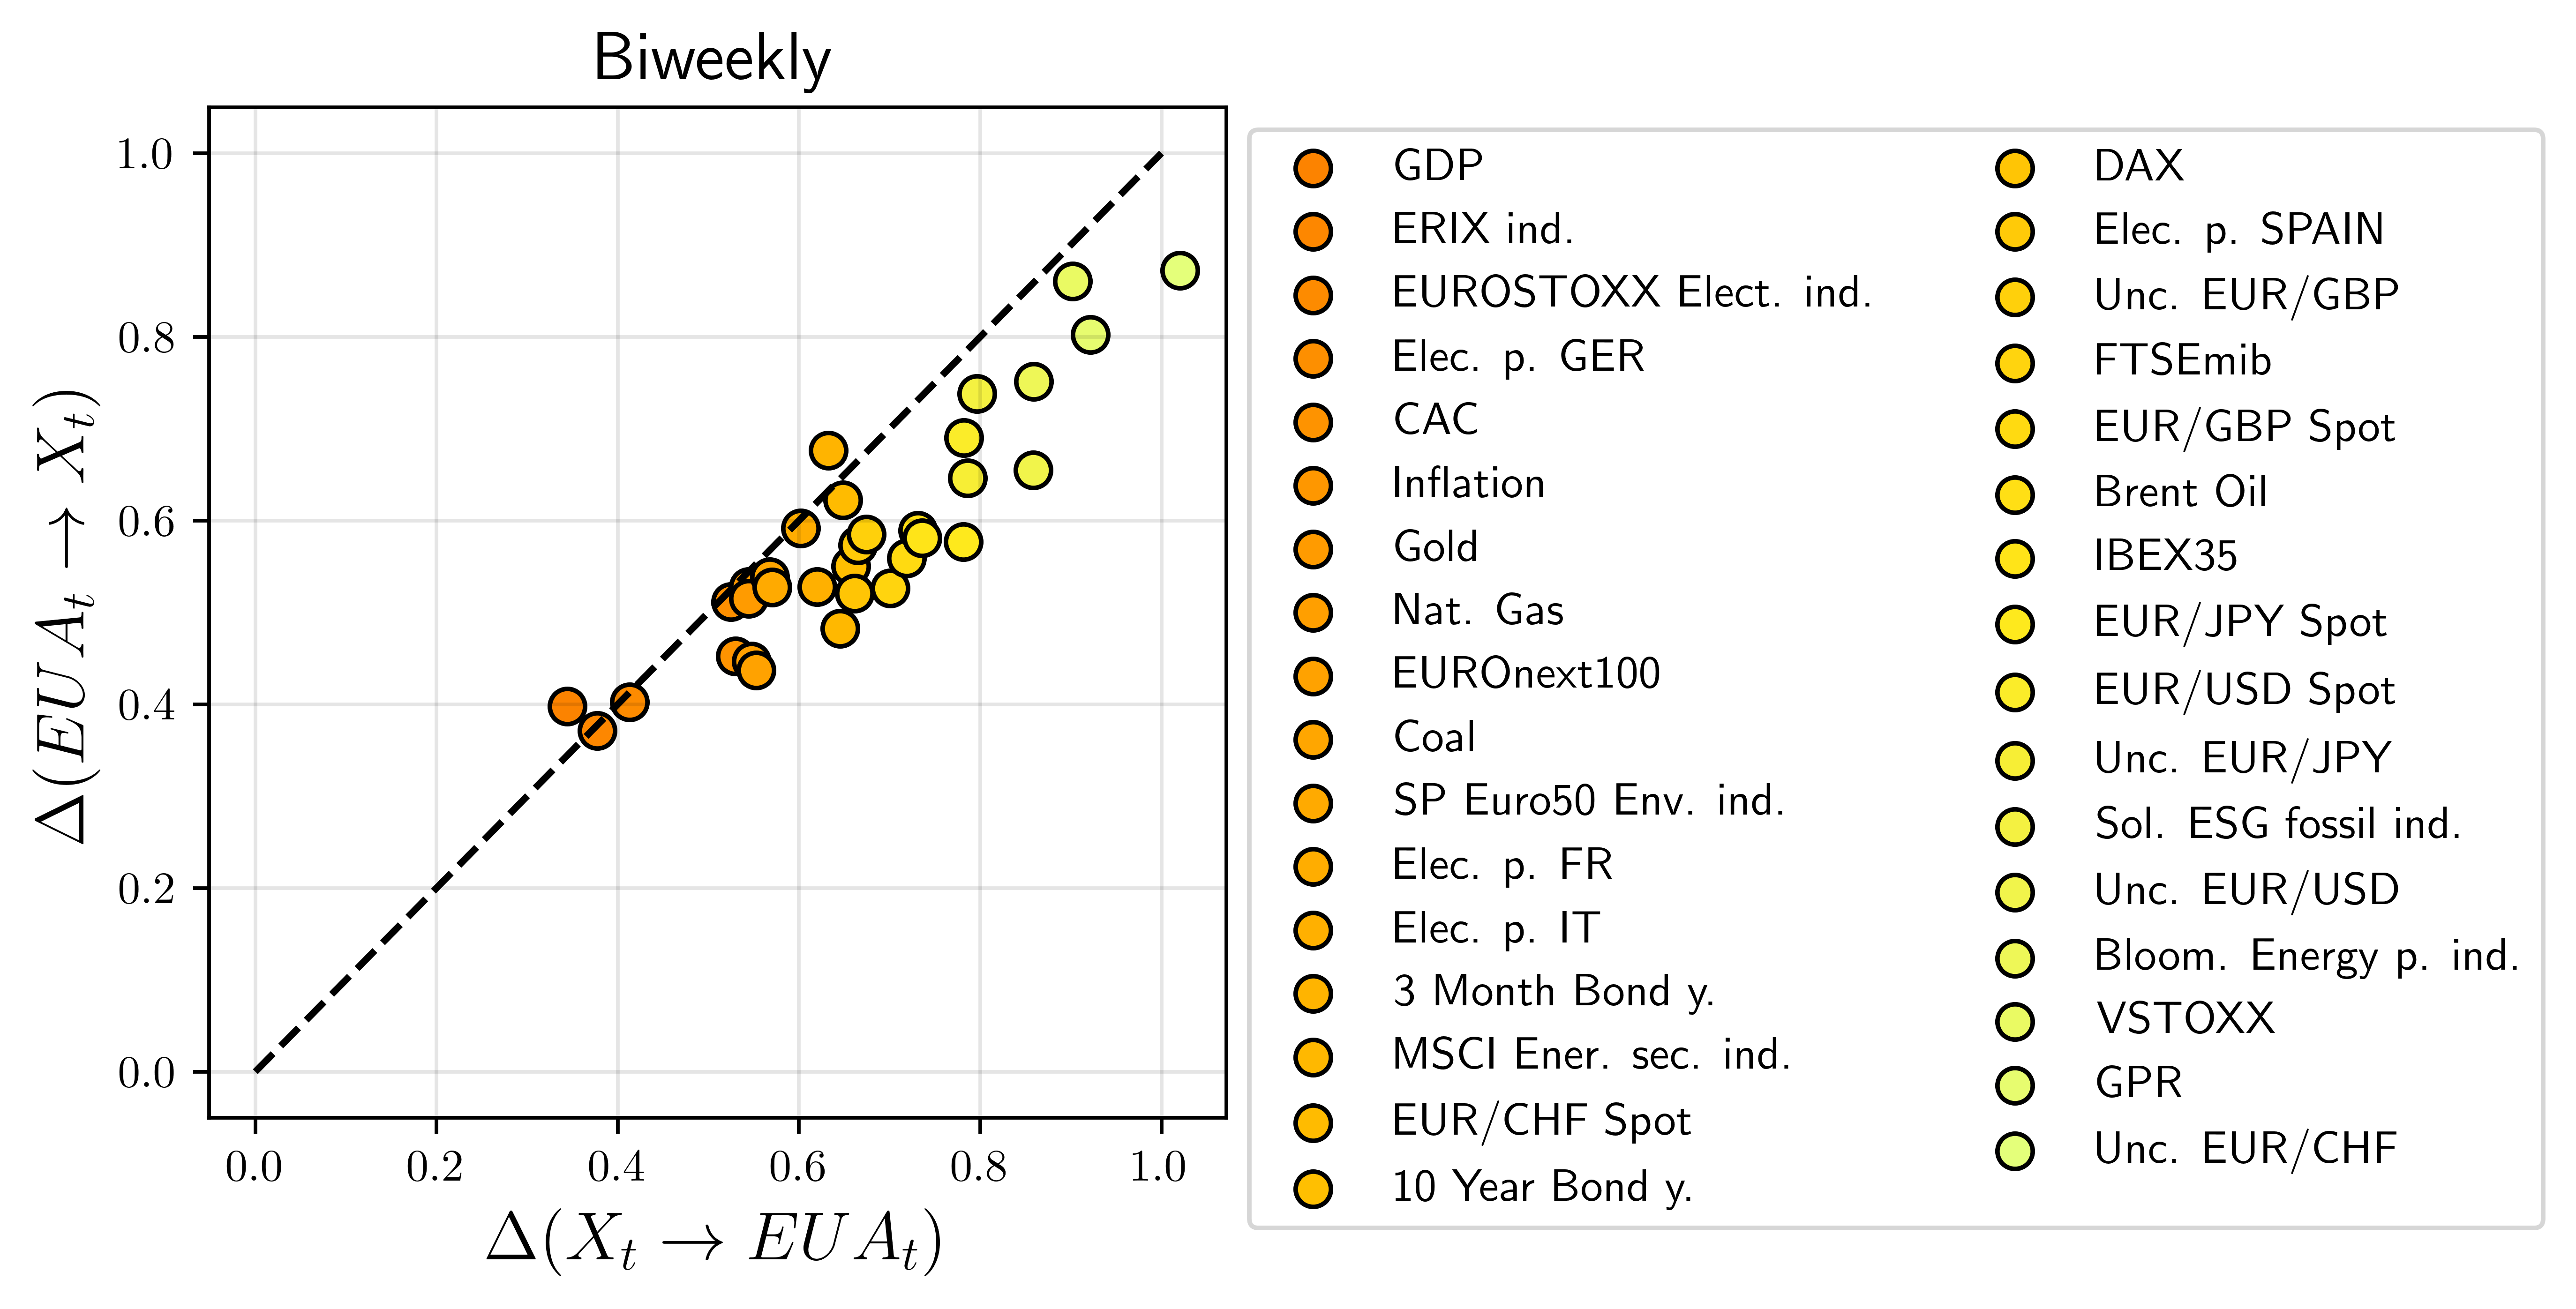

In [22]:
fig, ax = plt.subplots(figsize=(4,4), dpi = 700)
ax.set_facecolor("white")
for i, imbs in enumerate(single_imbs):
    plt.scatter(imbs[0], imbs[1], color = colors1_test[i], s=60, edgecolor ='k', label = labels[i])
plt.plot([0, 1], 'k--')
plt.legend(ncol = 2, bbox_to_anchor=(1.0, 1.))
plt.xlabel(r'$\Delta(X_{t} \rightarrow EUA_{t})$', fontsize=15)
plt.ylabel(r'$\Delta(EUA_{t}\rightarrow X_{t})$', fontsize=15)
plt.title('Biweekly', fontsize=15)
plt.grid(axis='both',color="black", alpha=.1)
#fig.savefig('../Figures/FigS2_Imbalance_Biweekly.png', dpi=700, bbox_inches='tight')

***

## Monthly

In [23]:
%reset -f

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dadapy import Data
from sklearn.preprocessing import StandardScaler
from dadapy import DataSets as ds
from utils_zero_dist_imbalance import _get_imbalance_from_d1_to_d2, _get_average_imbalance_from_d1_to_d2
from scipy.spatial.distance import pdist, squareform

plt.rcParams['text.usetex'] = True

In [25]:
NUM_COLORS1 = 33
cm_1 = plt.get_cmap('Wistia')
colors1 = [cm_1(1.*i/NUM_COLORS1) for i in range(NUM_COLORS1)]
colors1_test = np.array(colors1)
colors1_test = colors1_test[::-1]

In [26]:
files = ["../Data/biweekly_data.txt"]
file_labels = ["biweekly"]

labels = np.array(['GPR', 'VSTOXX', 'Unc. EUR/USD', 'Unc. EUR/JPY', 'Unc. EUR/GBP', 'Unc. EUR/CHF',
       'Nat. Gas', 'Elec. p. SPAIN', 'Elec. p. GER', 'Elec. p. IT',
       'Elec. p. FR', 'Brent Oil', 'Coal', 'Gold', 'EUR/USD Spot',
       'EUR/JPY Spot', 'EUR/GBP Spot', 'EUR/CHF Spot',
       'Bloom. Energy p. ind.', 'Sol. ESG fossil ind.',
       'SP Euro50 Env. ind.', 'MSCI Ener. sec. ind.', 'ERIX ind.', 'EUROnext100', 'IBEX35', 'DAX',
       'CAC', 'FTSEmib', 'EUROSTOXX Elect. ind.', '10 Year Bond y.', '3 Month Bond y.',
       'Inflation', 'GDP'])

In [27]:
data_sets = []
for file in files:
    data = np.genfromtxt(file)
    data_sets.append(data)

data_daily = np.genfromtxt(files[0])
y = []
X = []
y = data_daily[:, 0][:, None]
X = data_daily[:, 1:]

In [ ]:
d_y = Data(y, maxk=y.shape[0]-1)
d_y.compute_distances()

d_X = Data(X, maxk=X.shape[0]-1)
d_X.compute_distances()

d_y_dist_matrix = squareform(pdist(y, 'euclidean'))
imbalance_old = _get_imbalance_from_d1_to_d2(d_X, d_y)
imbalance_new =_get_imbalance_from_d1_to_d2(d_y, d_X)
imbalance_average_X_to_y = _get_average_imbalance_from_d1_to_d2(d_X, d_y_dist_matrix)

In [ ]:
inf_imb_X_to_y = []
inf_imb_X_to_y_average = []

for i in range(X.shape[1]):
    d_i = Data(X[:, [i]], maxk=X.shape[0]-1)
    d_i.compute_distances()
    inf_imb_X_to_y.append(_get_imbalance_from_d1_to_d2(d_i, d_y))
    inf_imb_X_to_y_average.append(_get_average_imbalance_from_d1_to_d2(d_i, d_y_dist_matrix))

In [ ]:
inf_imb_y_to_X = []
inf_imb_y_to_X_average = []

for i in range(X.shape[1]):
    X_i = X[:, [i]]
    d_x_i = squareform(pdist(X_i, 'euclidean'))
    d = Data(y, maxk=y.shape[0]-1)
    d.compute_distances()
    inf_imb_y_to_X.append(_get_imbalance_from_d1_to_d2(d, d_X))
    inf_imb_y_to_X_average.append(_get_average_imbalance_from_d1_to_d2(d, d_x_i))

In [31]:
sort_idx = np.argsort(inf_imb_X_to_y_average)
inf_imb_X_to_y_average = np.array(inf_imb_X_to_y_average)[sort_idx]
inf_imb_X_to_y = np.array(inf_imb_X_to_y)[sort_idx]
labels = labels[sort_idx]
inf_imb_y_to_X_average = np.array(inf_imb_y_to_X_average)[sort_idx]
inf_imb_y_to_X = np.array(inf_imb_y_to_X)[sort_idx]

In [32]:
enumeration = np.arange(1, len(inf_imb_X_to_y_average)+1)
single_imbs = np.zeros((33,2))
single_imbs[:,0] = inf_imb_X_to_y_average
single_imbs[:,1] = inf_imb_y_to_X_average

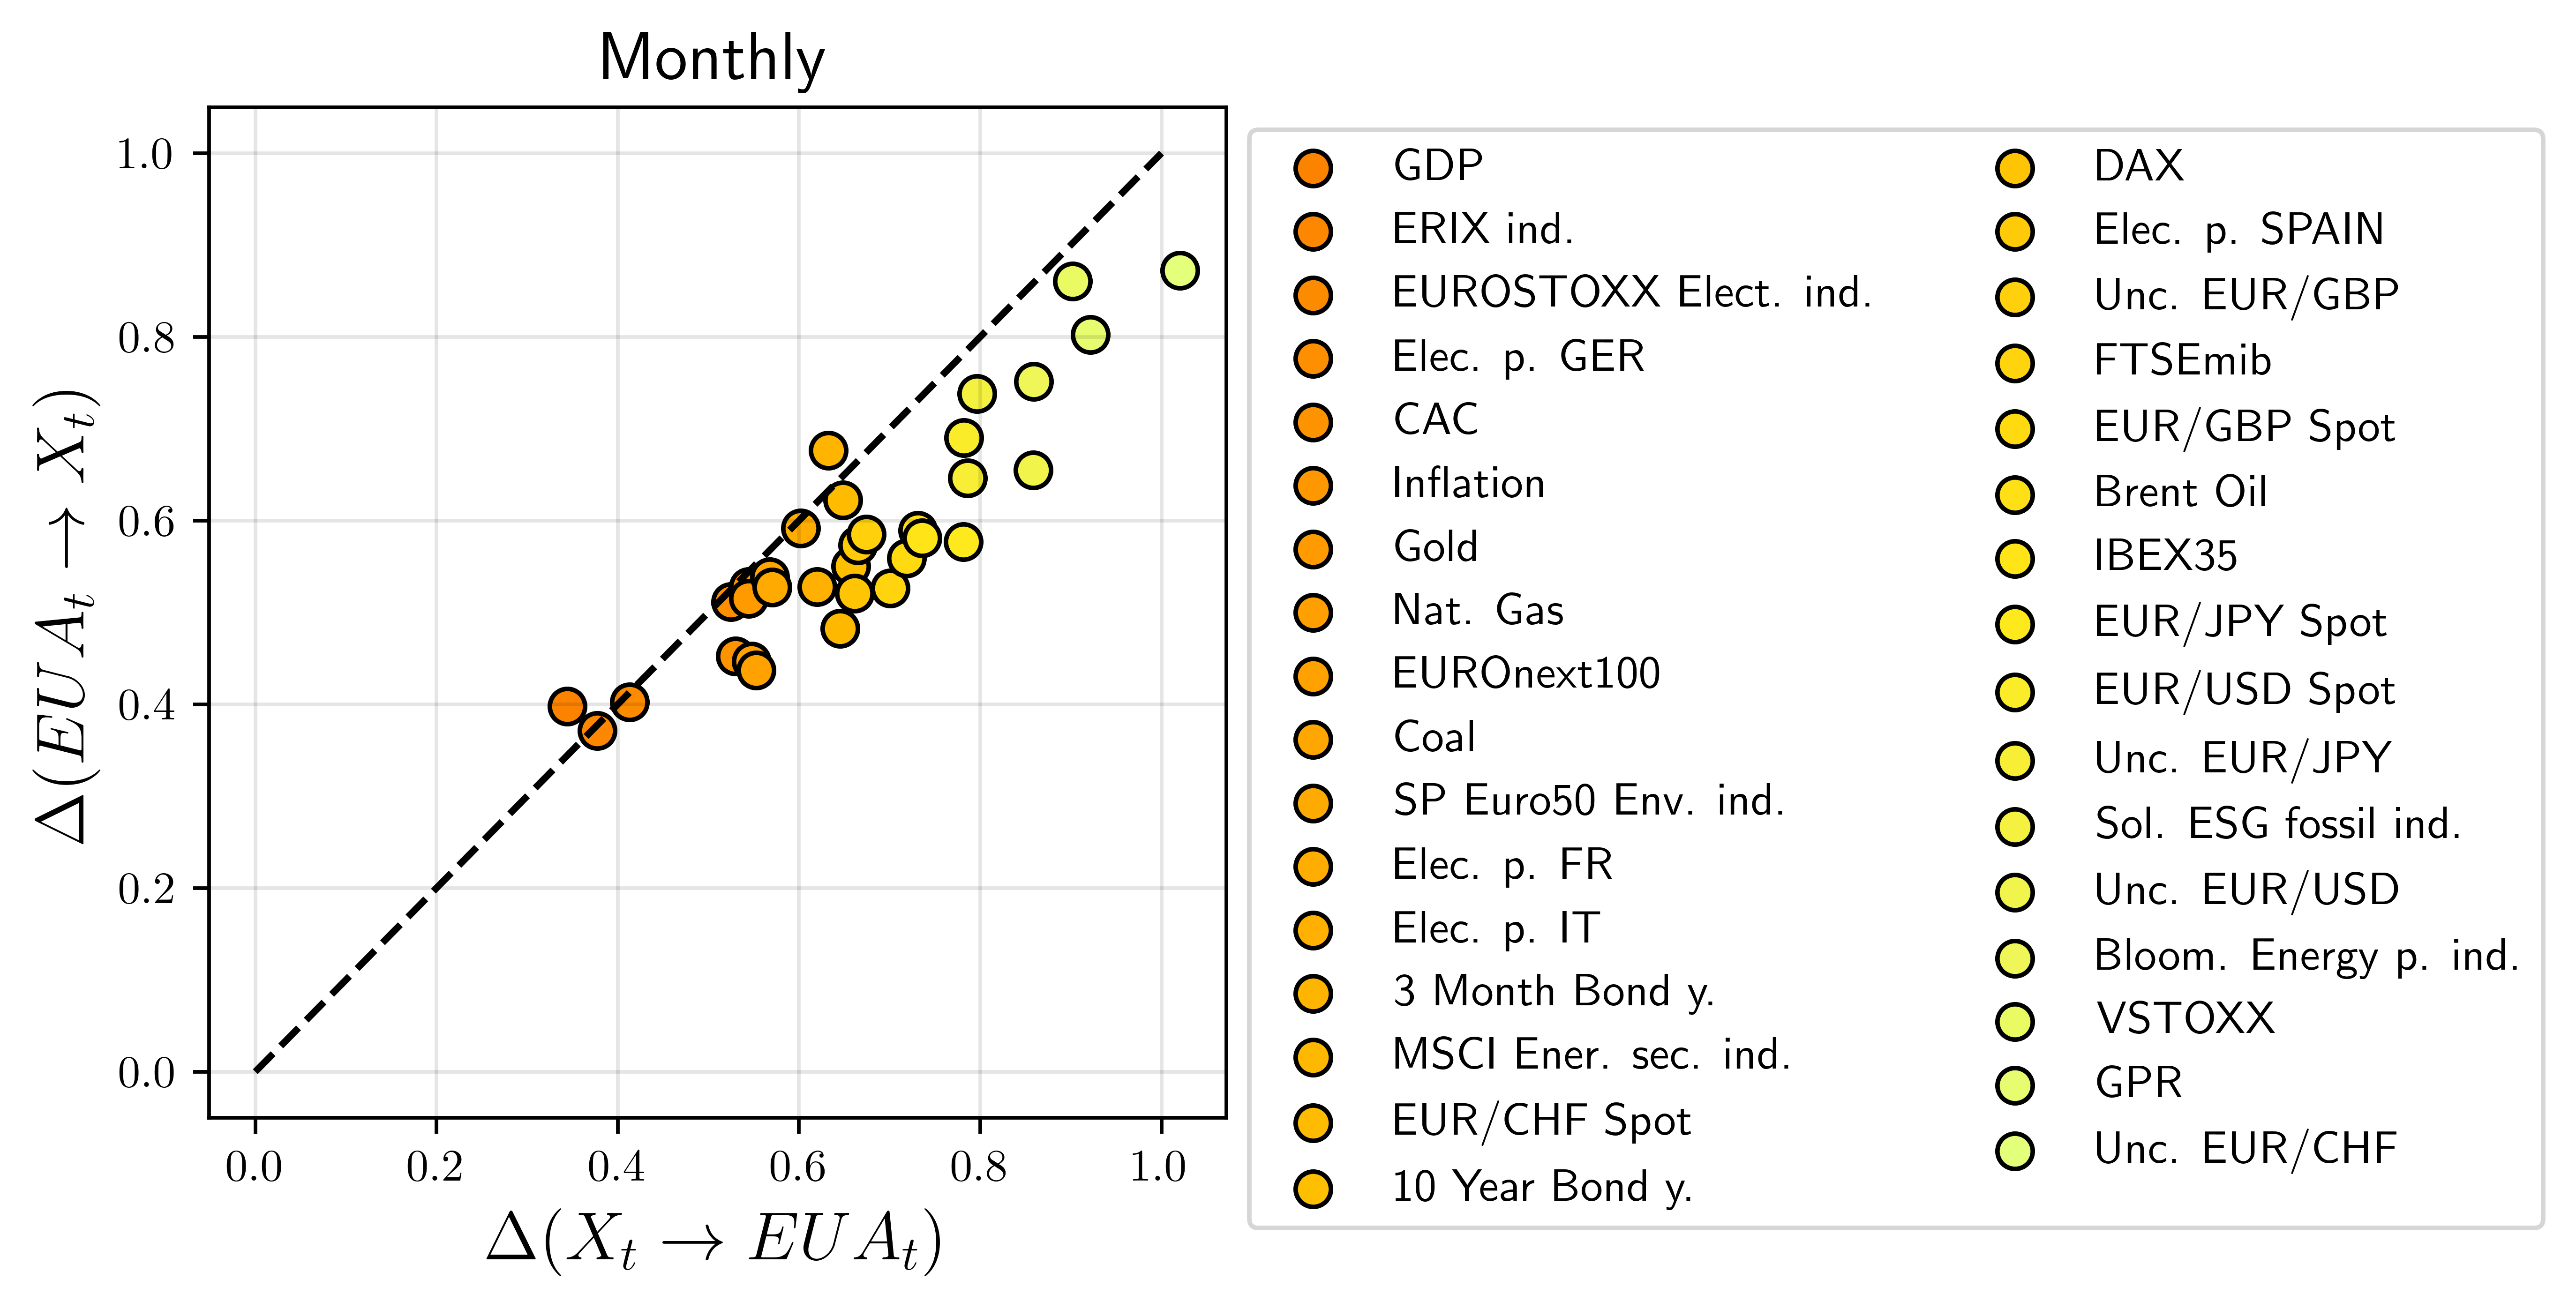

In [33]:
fig, ax = plt.subplots(figsize=(4,4), dpi = 700)
ax.set_facecolor("white")
for i, imbs in enumerate(single_imbs):
    plt.scatter(imbs[0], imbs[1], color = colors1_test[i], s=60, edgecolor ='k', label = labels[i])
plt.plot([0, 1], 'k--')
plt.legend(ncol = 2, bbox_to_anchor=(1.0, 1.))
plt.xlabel(r'$\Delta(X_{t} \rightarrow EUA_{t})$', fontsize=15)
plt.ylabel(r'$\Delta(EUA_{t}\rightarrow X_{t})$', fontsize=15)
plt.title('Monthly', fontsize=15)
plt.grid(axis='both',color="black", alpha=.1)
#fig.savefig('../Figures/FigS3_Imbalance_Monthly.png', dpi=700, bbox_inches='tight')

***